### Tensorflow Basics 

Tensorflow is a graph-based numerical computation library. Complex mathematical operations are described in a graph-like data structure, where nodes in the graph represent the mathematical operations, and connections between nodes represent the flow of data from operation to operation. In Tensorflow, these data are held as **tensor** objects, which is just a generalization of a matrix. 

![tf-graph](https://www.tensorflow.org/images/getting_started_add.png)

We will be using the Python API to access Tensorflow's data structures and functions, which are implemented in a highly efficient C++ backend. 

A Tensorflow program can be divided into two essential parts: 

1. Building a computational graph

2. Launching and running the computational graph

A **computational graph** is just a series of mathematical operations defined on some data, which we can easily create in Tensorflow. Let's create our first tensorflow program!

In [ ]:
# import our essential libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = tf.constant(3.0)
b = tf.constant(4.0)

In [3]:
print(a)
print(b)

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)


Printing out the nodes does not produce the values that you may have expected. This is because Tensorflow 

In [4]:
sess = tf.Session()
print(sess.run([a, b]))

[3.0, 4.0]


Let's learn a little more about Tensorflow's graph-based computations.

In [5]:
a = tf.constant(3.0)
b = tf.constant(4.0)
s = tf.multiply(a, b) # shortcut is just a + b
print(sess.run(s))

12.0


Exercise: Create constants and se Tensorflow's add, multiply, and subtract functions to evaluate: 
                (2 + 3) * 8 - 6 ( 4 + 6). 

Think about how you can express this computation as a graph. 

In [6]:
a = tf.constant(2.0)
b = tf.constant(3.0)
c = tf.constant(8.0)
s = tf.constant(6.0)
d = tf.constant(4.0)
a_plus_b = tf.add(a, b)
m = tf.multiply(a_plus_b, c)
n = tf.add(d, s)
sub = -tf.multiply(s, n)
ans = tf.add(m, sub)

In [7]:
sess.run(ans)

-20.0

#### Placeholders and Variables

What we've learned so far is pretty cool, but it's not particularly useful. We want to be able to run our computations on arbitrary data. And thus we must learn about placeholders and variables. 

A ** placeholder ** in Tensorflow is just a promise to provide some value at a later time. We can define a series of computations without knowing the actual data the computation will run on. 


In [8]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder = a + b

In [9]:
sess.run(adder) # what will happen if we run this?

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-e313f7515c9f>", line 1, in <module>
    a = tf.placeholder(tf.float32)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1502, in placeholder
    name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2149, in _placeholder
    name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [10]:
sess.run(adder, feed_dict = {a: 4.0, b: 5.0})

9.0

Next, we want to be able to create **variables** as a part of our computational graph. Can you guess why this is desirable? 



### Aside: Machine "Learning" 

What does it mean for a machine to learn? Many people have different definitions, but a good way to think about it is that you initialize a mathematical function with several ** variables ** set to some initial values. 

This function is one that takes in your **inputs** (say, handwritten digits) and produces some  **output** (say, the number that was written). We want to adjust these variables based on the several (input, output) pairs that we have, so that our function becomes very good at correctly mapping inputs to outputs. 

The mathematical methods by which these variables are adjusted is known as "learning". 

### Creating Variables in Tensorflow

One way to create variables in tensorflow is with the ``` tf.Variable() ``` API. When creating variables, we usually want to provide a method of ** initializing ** the variable, and usually also want to mention the ** dimensionality ** of the variable (ie, do we wish to create a constant? Or do we wish to create a vector or matrix of a certain dimension?)

With Tensorflow, we need to explicitly ** intialize ** all of our variable by registering a variable initailizer, and running it within our session. This may sound a little complicated, but its just 2 lines of code. 


In [11]:
W = tf.Variable(tf.constant(0.1, shape = [10,1])) # create a variable with information on how to initialize it and its dimensionality

Placeholders (tensors that we've promised to give data to later) can also take on arbitrary shapes. Of course, if you set a placeholder with a certain dimensionality, it will later expect data of that dimensionality!

In [12]:
x = tf.placeholder(tf.float32, shape = [1, 10])

In [13]:
mat_mul = tf.matmul(x, W)

In [14]:
data = np.arange(10).reshape((1,10)) # 0,1,2,3...10 reshaped into a 1 * 10 matrix

# initialize our variables
init = tf.global_variables_initializer() # the variable initializer
sess.run(init)
sess.run(mat_mul, feed_dict = {x: data}) # can you predict the output? 

array([[ 4.5]], dtype=float32)

### Recap
We've learned the very basics of tensorflow: how to represent the computational graphs, use placeholders to input data later, and create variables. It turns out that with these tools and a little knowledge about optimization in Tensorflow, we can easily implement many machine learning models. Let's get to it!

### Linear Regression

Linear regression can be thought of as the "hello world" of machine learning. It's relatively straigthforward to implement once you understand it, yet (unlike a simple "hello world" app) is powerful enough to have signficant use in industry. Let's take a look at the linear regression problem. 

We have some (input, output) pairs which we denote as $ (x_i, y_i) $ and we have $n$ of these, so $i \in [1...n]$. We want to learn a function $f: x \rightarrow{} y$ that maps inputs to outputs. 

At this point, you might be thinking "why is this hard?" - and you'd be right to ask that question. I missed one crucial point in my explanation - the idea of generalization.

In [15]:
from sklearn.datasets import load_boston
data, targets = load_boston(True)
print(data.shape)
print(targets.shape)


(506, 13)
(506,)


In [16]:
X = tf.placeholder(tf.float32, shape = [None, 13])
y = tf.placeholder(tf.float32, shape = [None,1])

W = tf.Variable(tf.constant(0.1, shape = [13,1 ]))
b = tf.Variable(tf.constant(0.1))

In [17]:
y_pred = tf.matmul(X, W) + b
loss = tf.reduce_mean(tf.square(y_pred - y))
opt = tf.train.GradientDescentOptimizer(learning_rate = .5).minimize(loss)

In [18]:
init = tf.global_variables_initializer()

from sklearn.preprocessing import normalize
data = normalize(data)
targets = targets.reshape((targets.shape[0],1))

In [19]:
sess = tf.InteractiveSession()
sess.run(init)
initial_loss = loss.eval(feed_dict = {X: data, y: targets})
print("initial loss: {}".format(initial_loss))
for i in range(5000):
    sess.run(opt, feed_dict = {X: data, y: targets})
    if i % 100 == 0:
        print(loss.eval(feed_dict = {X: data, y: targets}))

final_loss = loss.eval(feed_dict = {X: data, y: targets})
print("final loss: {}".format(final_loss))

initial loss: 580.4369506835938
510.135
62.0172
60.3501
59.1813
58.2976
57.5826
56.9715
56.4274
55.9287
55.4625
55.0207
54.5982
54.1914
53.7978
53.4157
53.0439
52.6813
52.3272
51.981
51.6422
51.3105
50.9855
50.6669
50.3546
50.0484
49.748
49.4532
49.164
48.8802
48.6018
48.3284
48.0601
47.7968
47.5383
47.2845
47.0354
46.7909
46.5508
46.3151
46.0837
45.8565
45.6334
45.4144
45.1993
44.9882
44.7808
44.5772
44.3772
44.1809
43.9881
final loss: 43.80063247680664


In [55]:
predictions = sess.run(y_pred, feed_dict = {X: data})
predictions = predictions.flatten()
targets = targets.reshape((506))

# lets take a look at some
for i in range(10):
    randint = np.random.randint(0, 506)
    pred = predictions[randint]
    actual = targets[randint]
    print("prediction: {}, actual was: {}".format(pred, actual))


prediction: 26.51154327392578, actual was: 21.1
prediction: 22.60431671142578, actual was: 21.7
prediction: 18.12044906616211, actual was: 21.9
prediction: 23.09864616394043, actual was: 16.6
prediction: 27.647022247314453, actual was: 31.2
prediction: 26.384498596191406, actual was: 29.6
prediction: 12.949607849121094, actual was: 13.4
prediction: 17.885560989379883, actual was: 15.2
prediction: 22.12126350402832, actual was: 20.3
prediction: 24.707252502441406, actual was: 24.3


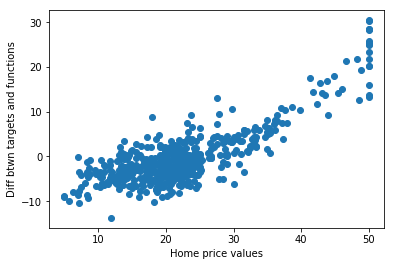

In [64]:
# Lets plot the absolute differences as a function of the actual price
absdiff = (targets - predictions)
plt.xlabel('Home price values')
plt.ylabel('Diff btwn targets and functions')
plt.scatter(targets, absdiff)
plt.show()